1. Análisis Exploratorio de Datos (2 puntos)
- Carga el dataset en un DataFrame de Pandas.
- Muestra las primeras 5 filas y usa .info() para obtener información sobre los datos.
- Calcula estadísticas descriptivas con .describe().
- Genera un histograma del número de entrenamientos semanales.

            Edad   Altura_cm    Peso_kg  Entrenamientos_Semanales  \
count   7.000000    7.000000   7.000000                  7.000000   
mean   35.000000  174.571429  68.428571                  7.285714   
std     6.831301   18.715921  17.614929                  1.799471   
min    26.000000  142.000000  47.000000                  5.000000   
25%    30.500000  167.000000  57.500000                  6.000000   
50%    35.000000  175.000000  65.000000                  7.000000   
75%    39.000000  188.000000  79.000000                  8.500000   
max    45.000000  195.000000  94.000000                 10.000000   

       Medallas_Totales  
count          7.000000  
mean           8.571429  
std            6.803361  
min            3.000000  
25%            4.500000  
50%            7.000000  
75%            9.000000  
max           23.000000  


array([[<Axes: title={'center': 'Entrenamientos_Semanales'}>]],
      dtype=object)

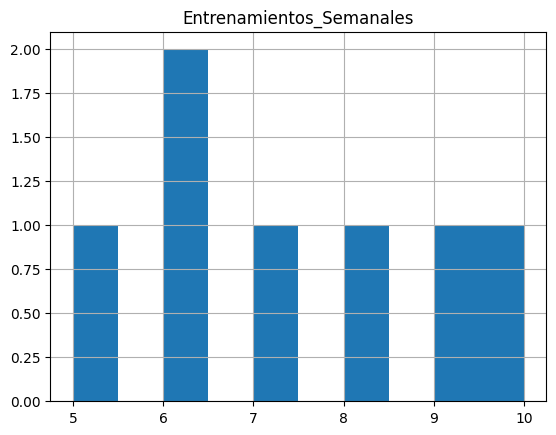

In [17]:
import pandas as pd
import numpy as np

olimpicos = pd.read_csv('/content/sample_data/olimpicos.csv')
olimpicos.head(5)
print(olimpicos.describe())
olimpicos.hist(column='Entrenamientos_Semanales')

2. Estadística Descriptiva (2 puntos)
- Determina el tipo de variable de cada columna.
- Calcula la media, mediana y moda de la cantidad de medallas obtenidas.
- Calcula la desviación estándar de la altura de los atletas.
- Identifica valores atípicos en la columna de peso utilizando un boxplot.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Atleta                    7 non-null      object
 1   Edad                      7 non-null      int64 
 2   Altura_cm                 7 non-null      int64 
 3   Peso_kg                   7 non-null      int64 
 4   Deporte                   7 non-null      object
 5   Entrenamientos_Semanales  7 non-null      int64 
 6   Medallas_Totales          7 non-null      int64 
 7   Pais                      7 non-null      object
dtypes: int64(5), object(3)
memory usage: 580.0+ bytes
Mean of Medallas_Totales: 8.571428571428571
Median of Medallas_Totales: 7.0
Mode of Medallas_Totales: 0     3
1     4
2     5
3     7
4     8
5    10
6    23
Name: Medallas_Totales, dtype: int64
Standard Deviation of Altura_cm: 18.715921411614076


<Axes: >

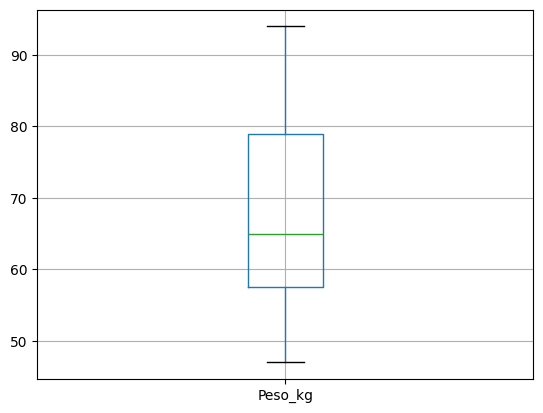

In [16]:
olimpicos.info()
print("Mean of Medallas_Totales:", olimpicos["Medallas_Totales"].mean())
print("Median of Medallas_Totales:", olimpicos["Medallas_Totales"].median())
print("Mode of Medallas_Totales:", olimpicos["Medallas_Totales"].mode())
print("Standard Deviation of Altura_cm:", olimpicos["Altura_cm"].std())
olimpicos.boxplot(column='Peso_kg')

3. Análisis de Correlación (2 puntos)
- Calcula la correlación de Pearson entre entrenamientos semanales y medallas totales.
- Crea un gráfico de dispersión (scatterplot) entre peso y medallas totales con Seaborn.
- Explica si existe correlación entre estas variables.

Correlación Entrenamientos semanales x Medallas Totales: 0.5698362008613984


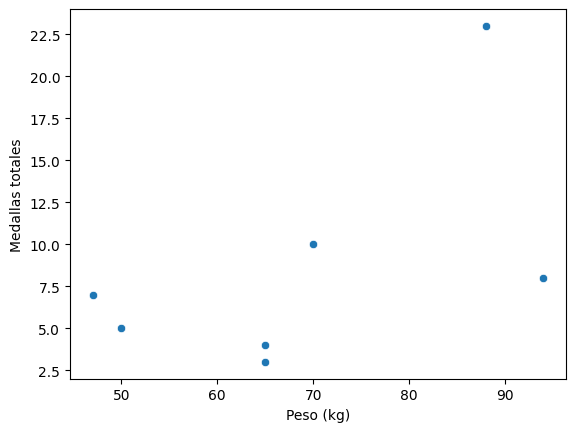

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = olimpicos["Entrenamientos_Semanales"].corr(olimpicos["Medallas_Totales"])
print(f"Correlación Entrenamientos semanales x Medallas Totales: {correlation}")
sns.scatterplot(data=olimpicos, x='Peso_kg', y='Medallas_Totales')
plt.xlabel("Peso (kg)")
plt.ylabel("Medallas totales")
plt.show()

4. Regresión Lineal (2 puntos)
- Implementa un modelo de regresión lineal para predecir el número de medallas obtenidas en función del número de entrenamientos semanales.
- Obtén los coeficientes de regresión e interpreta el resultado.
- Calcula el R² para medir el ajuste del modelo.
- Usa Seaborn (regplot) para graficar la regresión lineal.

Coeficiente de regresión: 2.1544117647058822
Beta 0: -7.125
Beta 1: 2.1544117647058822
R²: 0.32471329581215214


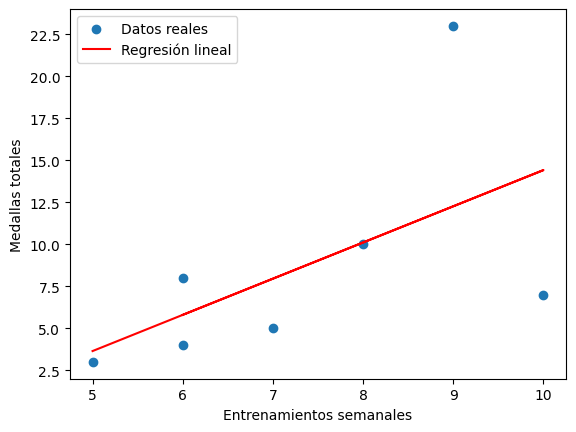

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = olimpicos["Entrenamientos_Semanales"].values.reshape(-1, 1)
y = olimpicos["Medallas_Totales"].values

modelo = LinearRegression()
modelo.fit(X, y)

coef_regresion = modelo.coef_[0]
print(f"Coeficiente de regresión: {coef_regresion}")

beta_0 = modelo.intercept_
print(f"Beta 0: {beta_0}")
beta_1 = modelo.coef_[0]
print(f"Beta 1: {beta_1}")

y_pred = modelo.predict(X)

plt.scatter(X, y, label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel('Entrenamientos semanales')
plt.ylabel('Medallas totales')
plt.legend()

y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
print(f"R²: {r2}")

5. Visualización de Datos con Seaborn y Matplotlib (2 puntos)
- Crea un heatmap de correlación entre todas las variables numéricas.
- Crea un boxplot de la cantidad de medallas por disciplina deportiva.
- Personaliza los gráficos con títulos, etiquetas y colores.

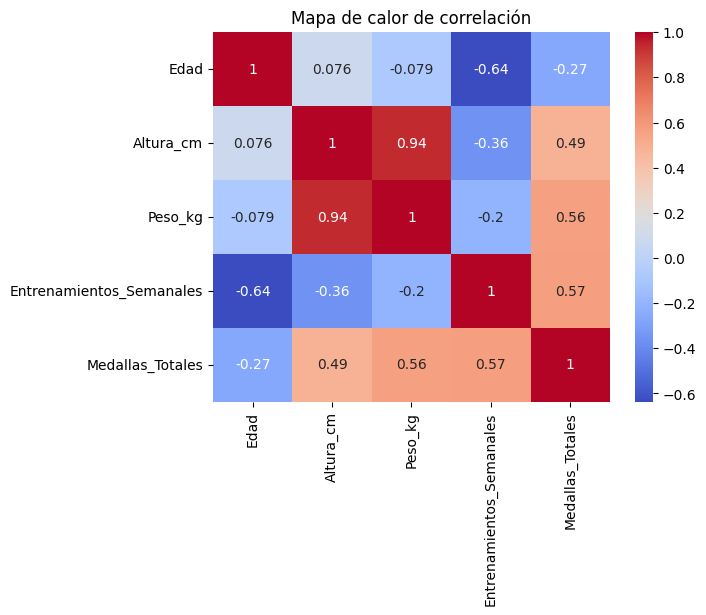

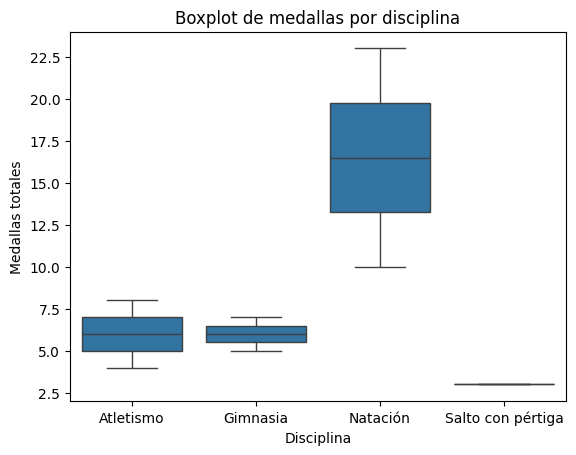

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_olimpicos = olimpicos.select_dtypes(include=np.number)
corr_matrix = numeric_olimpicos.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
plt.show()

sns.boxplot(x='Deporte', y='Medallas_Totales', data=olimpicos)
plt.title('Boxplot de medallas por disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Medallas totales')
plt.show()